# Question1

    given: (n, k) and (k, m) matrix

    => The resultant matrix would have a dimension of (n, m). 

    Considering row to column multiplication: 


    The elements in the resulting matrix is obtained by multiplying each element of the row of the first matrix to the corresponding element from the column of the second matrix.


## No of Multiplications:

    let's say for obtaining the first element of the resultant matrix, (1) we perform multiplications equal to the no of rows in the second matrix (or say no of columns in the first matrix), and (2) we perform such multiplications for no of columns in second matrix i.e. m times to get the elements of the first row of the resultant matrix (C). 
    and (3) we have n rows in first matrix, therefore total multiplications performed => k*m*n


## No of Additions:

    for (1) we perform k-1 additions (2) m (3) n 
    => k-1 * m * n

# Question2

In [7]:
import time
import numpy as np

def multiplication_using_list_of_lists(a, b):
    n = len(a)
    k = len(a[0])
    m = len(b[0])

    result = [[0] * m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j] += a[i][l] * b[l][j]

    return result

# Generating larger matrices to compare times
a = np.random.rand(100, 99).tolist()
b = np.random.rand(99, 100).tolist()

# time using "lists of lists"
ti = time.time()
output_lists = multiplication_using_list_of_lists(a, b)
tf = time.time()
print("time using lists of lists:", tf - ti)

# Multiplication using NumPy
tii = time.time()
output_numpy = np.dot(a, b)
tff = time.time()
print("time using NumPy:", tff - tii)


time using lists of lists: 0.17755627632141113
time using NumPy: 0.0020003318786621094


#### Reason why NumPy takes lesser time for relatively larger matrices is: 

    1. NumPy is a library used for working with arrays, and it is build on top of optimized, low-level libraries written in C.These libraries are highly efficient and are capable of handling matrix operations with great speed.

    2. NumPy operates on entire arrays (or matrices) at once. This allows NumPy to execute operations in a more parallelized manner, further enhancing performance.

    3. NumPy implements highly optimized algorithms for common numerical operations, such as matrix multiplication.

# Question3

In [38]:
import random
import time
import numpy as np

n = random.randint(1, 1000)

arr = [random.random() for i in range(n)]

dup = arr.copy()

#print(arr)

def passes_median(arr, n):
    dic = {}
    for i in range(n):
        dic[arr[i]]= -1
    key =[]
    #print(arr)
    for i in range(n//2+1):
        maxi = arr[0]
        for j in range(n):
            if maxi <= arr[j]:
                maxi = arr[j]
                index = j
                
        if (dic[maxi] != index):
            dic[maxi] = index
            key.append(maxi) 
            arr[index] = -1
    if (n%2==0):
        #print(key[-1], key[-2])
        median = (key[-1]+key[-2])/2
    else:
        #print(key[-1])
        median = key[-1]
    #print(dic)
    return median
        
def optimal_median(arr, n):
    arr.sort()
    #print(arr)
    if (n%2==0):
        #print(arr[n//2], arr[n//2-1])
        median = (arr[n//2]+arr[n//2-1])/2
    else:
        #print(arr[n//2])
        median = arr[n//2]
    return median

def numpy_median(arr, n):
    return np.median(arr)
#print(arr)
#print(dic)

print(passes_median(dup, n), optimal_median(arr, n), numpy_median(arr, n))

0.4573357550584013 0.4573357550584013 0.4573357550584013


In [39]:
time_passes=[]
time_optimal=[]
time_numpy = []

for i in range(1000):
    n = random.randint(1, 1000)
    arr = [random.random() for i in range(n)]
    dup = arr.copy()
    start = (time.time())*1000
    med= passes_median(dup, n)
    end = (time.time())*1000
    time_passes.append(end-start)
    
    start = (time.time())*1000
    med = optimal_median(arr, n)
    end = (time.time())*1000
    time_optimal.append(end-start)

    start = (time.time())*1000
    med = numpy_median(arr, n)
    end = (time.time())*1000
    time_numpy.append(end-start)
    
Meantime_passes = sum(time_passes)/100
Meantime_optimal = sum(time_optimal)/100
Meantime_numpy = sum(time_numpy)/100

time_passes = np.array(time_passes)
time_optimal = np.array(time_optimal)
time_numpy = np. array(time_numpy)

print("Using passes")
print("Average time = ", Meantime_passes, "+/-",np.std(time_passes)  )

print("Optimal method")
print("Average time = ", Meantime_optimal, "+/-", np.std(time_optimal))

print("Numpy passes")
print("Average time = ", Meantime_numpy, "+/-",np.std(time_numpy)  )

Using passes
Average time =  108.9316748046875 +/- 10.493055476858066
Optimal method
Average time =  0.60082275390625 +/- 0.24088522644473975
Numpy passes
Average time =  1.75313720703125 +/- 0.3923906459586568


    We can observe that the optimal method of findind median is faster than the other mentioned menthods to find the median.

    Run time of optimal method used = $O(nlogn)$
    Run time of passes method used = $O(n^2)$

# Question4

given function: 

$$
f(x, y)=x^2 y+y^3 \sin (x)
$$

Partial derivative with respect to x:

$$
\frac{\partial f}{\partial x}=2 x y-y^3 \cos (x)
$$

Partial derivative with respect to y:

$$
\frac{\partial f}{\partial y}=x^2+3 y^2 \sin (x)
$$

gradient of the function with respect to x and y is the following vector:

$$
\nabla f=\left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)=\left(2 x y-y^3 \cos (x), x^2+3 y^2 \sin (x)\right)
$$

In [9]:
!pip install jax

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.7 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.7 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 3.3 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.7 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 6.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install jax jaxlib

   ---------------------------------------- 0.0/46.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.0 MB 1.3 MB/s eta 0:00:36
   ---------------------------------------- 0.2/46.0 MB 2.0 MB/s eta 0:00:24
   ---------------------------------------- 0.5/46.0 MB 3.5 MB/s eta 0:00:13
    --------------------------------------- 1.0/46.0 MB 5.5 MB/s eta 0:00:09
   - -------------------------------------- 1.6/46.0 MB 7.1 MB/s eta 0:00:07
   - -------------------------------------- 2.2/46.0 MB 8.0 MB/s eta 0:00:06
   -- ------------------------------------- 3.1/46.0 MB 10.4 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/46.0 MB 10.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.8/46.0 MB 12.1 MB/s eta 0:00:04
   ----- ---------------------------------- 5.8/46.0 MB 13.3 MB/s eta 0:00:04
   ----- ---------------------------------- 6.7/46.0 MB 13.8 MB/s eta 0:00:03
   ------ --------------------------------- 8.0/46.0 MB 15.1 MB/s eta 0:00:03



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
pip install autograd

     ---------------------------------------- 0.0/840.9 kB ? eta -:--:--
     -- ------------------------------------ 61.4/840.9 kB 1.1 MB/s eta 0:00:01
     -------- ----------------------------- 194.6/840.9 kB 2.0 MB/s eta 0:00:01
     ---------------- --------------------- 368.6/840.9 kB 2.9 MB/s eta 0:00:01
     ----------------------------- -------- 645.1/840.9 kB 3.4 MB/s eta 0:00:01
     -------------------------------------  839.7/840.9 kB 4.1 MB/s eta 0:00:01
     -------------------------------------- 840.9/840.9 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/49.3 kB ? eta -:--:--
   ---------------------------------------- 49.3/49.3 kB 2.4 MB/s eta 0:00:00
  Created wheel for future: filename=future-0.18.3-py3-none-any.whl size=492053 sha256=f428df3590867a7594a51a89ae969035693744ede767b5a010e1c6d8fd65c16e
  Stored in directory: c:\users\karee\appdata


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import random
import autograd.numpy as np
from autograd import grad

def x_grad(x, y):
    return 2 * x * y + (y**3) * np.cos(x)

def y_grad(x, y):
    return (x**2) + 3 * (y**2) * np.sin(x)

def function(x, y):
    return (x**2) * y + (y**3) * np.sin(x)

grad_function = grad(function, argnum=(0, 1))

x = random.random()
y = random.random()

gradx_manual = x_grad(x, y)
grady_manual = y_grad(x, y)

print("Manual")
print("Gradient w.r.t x =", gradx_manual, "Gradient w.r.t y =", grady_manual)

print("Autograd")
print("Gradient w.r.t x =", grad_function(x, y)[0], "Gradient w.r.t y =", grad_function(x, y)[1])

Manual
Gradient w.r.t x = 0.25785389988524104 Gradient w.r.t y = 0.1740385439731471
Autograd
Gradient w.r.t x = 0.25785389988524104 Gradient w.r.t y = 0.1740385439731471


# Question6

In [20]:
!pip install sympy


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import numpy as np

import sympy as sp
x, y = sp.symbols('x, y')
f = (x**2)*y + (y**3)*(sp.sin(x))
print("x gradient = ", sp.diff(f, x))
print("y gradient = ", sp.diff(f, y))

x gradient =  2*x*y + y**3*cos(x)
y gradient =  x**2 + 3*y**2*sin(x)


# Question7

In [23]:
Student_info = {2022:{"Branch 1":{"Roll Number": 100, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 78, "English": 66} }, 
                      "Branch 2":{"Roll Number": 101, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 90, "English": 56} }}, 
                
               2023: {"Branch 1":{"Roll Number": 102, 
                                  "Name":"std1",  
                                  "Marks":{"Maths": 36, "English": 98} }, 
                      "Branch 2":{"Roll Number": 103, 
                                  "Name":"std2",  
                                  "Marks":{"Maths": 70, "English": 67} }},
                
               2024: {"Branch 1":{"Roll Number": 104, 
                                  "Name":"std3",  
                                  "Marks":{"Maths": 84, "English": 88} }, 
                      "Branch 2":{"Roll Number": 105, 
                                  "Name":"std4",  
                                  "Marks":{"Maths": 97, "English": 97} }}, 
                
               2025: {"Branch 1":{"Roll Number": 106, 
                                  "Name":"std5",  
                                  "Marks":{"Maths": 88, "English": 79} }, 
                      "Branch 2":{"Roll Number": 107, 
                                  "Name":"std6",  
                                  "Marks":{"Maths": 75, "English": 85} }}}

print(Student_info)

{2022: {'Branch 1': {'Roll Number': 100, 'Name': 'std1', 'Marks': {'Maths': 78, 'English': 66}}, 'Branch 2': {'Roll Number': 101, 'Name': 'std1', 'Marks': {'Maths': 90, 'English': 56}}}, 2023: {'Branch 1': {'Roll Number': 102, 'Name': 'std1', 'Marks': {'Maths': 36, 'English': 98}}, 'Branch 2': {'Roll Number': 103, 'Name': 'std2', 'Marks': {'Maths': 70, 'English': 67}}}, 2024: {'Branch 1': {'Roll Number': 104, 'Name': 'std3', 'Marks': {'Maths': 84, 'English': 88}}, 'Branch 2': {'Roll Number': 105, 'Name': 'std4', 'Marks': {'Maths': 97, 'English': 97}}}, 2025: {'Branch 1': {'Roll Number': 106, 'Name': 'std5', 'Marks': {'Maths': 88, 'English': 79}}, 'Branch 2': {'Roll Number': 107, 'Name': 'std6', 'Marks': {'Maths': 75, 'English': 85}}}}


# Question8

In [24]:
class year:
  def __init__(self, years, branch):
    self.years= years
    self.branch = branch

class Branch:
  def __init__(self, branch, student_data):
    self.branch = branch
    self.student_data = student_data

class Data:
  def __init__(self, Roll_num, Name, Marks):
    self.Roll_num = Roll_num
    self.Name = Name
    self.Marks= Marks


Database = [year(2022, [Branch("Branch 1", [Data(100, "cat1", {"Eng": 86, "Social": 65})]), Branch("Branch 2", [Data(101, "dog1", {"Eng": 76, "Social": 65})])]), 
            year(2023, [Branch("Branch 1", [Data(102, "cat2", {"Eng": 89, "Social": 93})]), Branch("Branch 2", [Data(103, "dog2", {"Eng": 84, "Social": 83})])]),
            year(2024, [Branch("Branch 1", [Data(104, "cat3", {"Eng": 23, "Social": 67})]), Branch("Branch 2", [Data(105, "dog3", {"Eng": 73, "Social": 65})])]),
            year(2025, [Branch("Branch 1", [Data(106, "cat4", {"Eng": 84, "Social": 82})]), Branch("Branch 2", [Data(107, "dog4", {"Eng": 56, "Social": 85})])]),
            year(2026, [Branch("Branch 1", [Data(108, "cat5", {"Eng": 90, "Social": 63})]), Branch("Branch 2", [Data(109, "dog5", {"Eng": 74, "Social": 87})])])]

# Question9

1


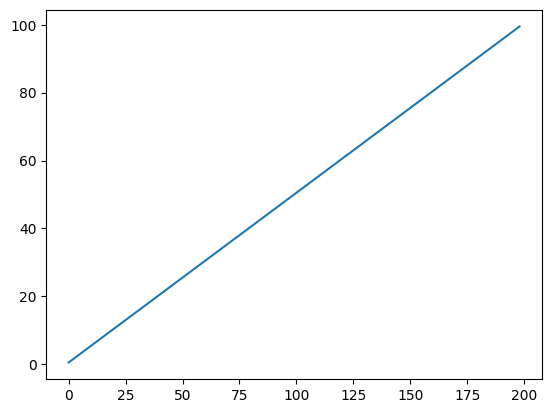

In [25]:
import numpy as np
from matplotlib import pyplot as plt

x = np.arange(0.5, 100, 0.5)

#1 
print("1")

y = x

plt.plot(y)

2


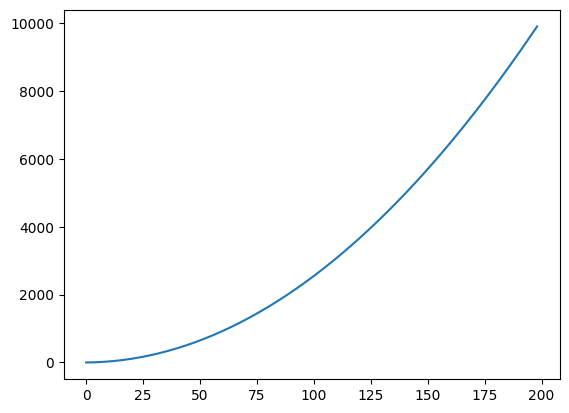

In [26]:
#2 
print("2")

y = x*x

plt.plot(y)

3


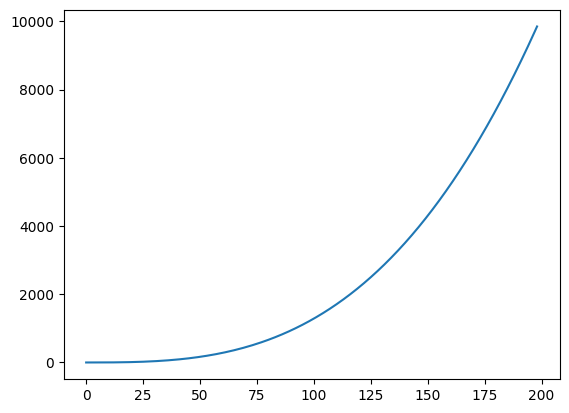

In [27]:
#3 
print("3")

y = (x**3)/100

plt.plot(y)

4


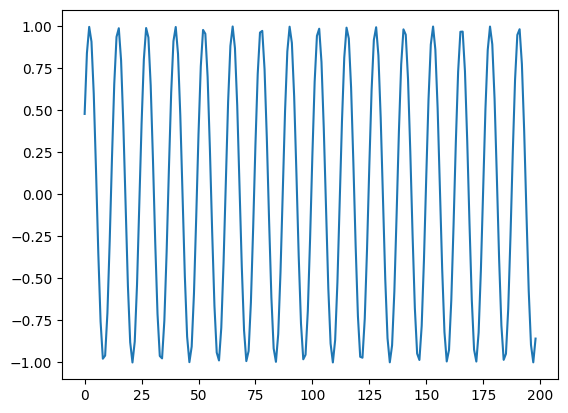

In [28]:
#4 
print("4")

y = np.sin(x)

plt.plot(y)

5


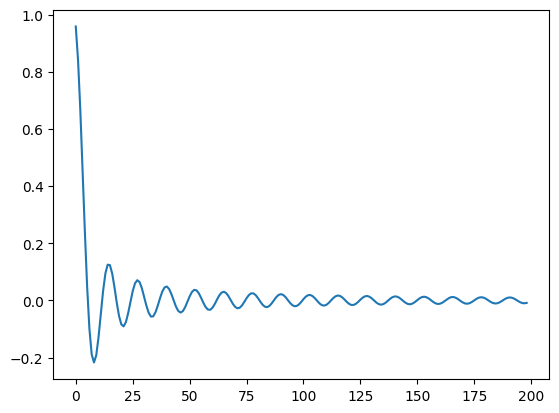

In [29]:
#5
print("5")

y = y/x

plt.plot(y)

6


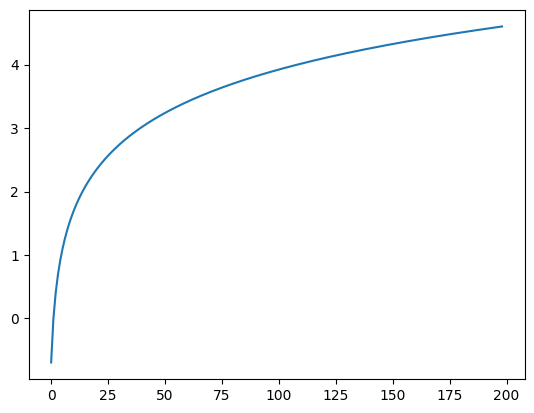

In [30]:
#6
print("6")

y = np.log(x)

plt.plot(y)

7


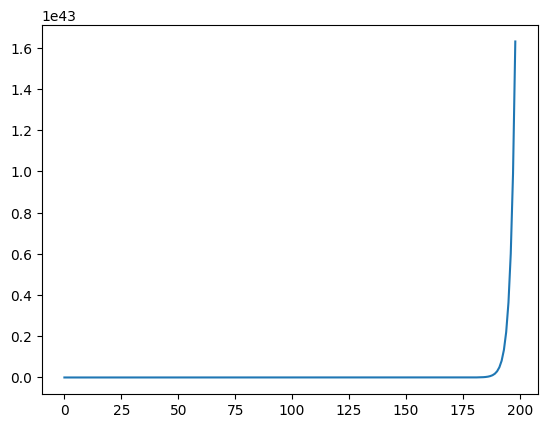

In [31]:
#7
print("7")

y = np.exp(x)

plt.plot(y)

# Question10

In [32]:
import pandas as pd
m = 20
n = 5

Col_name= ["a", "b", "c", "d", "e"]
Matrix = np.random.uniform(1, 2, size= (m, n))



#print(Matrix)

df = pd.DataFrame(Matrix, columns= ["a", "b", "c", "d", "e"])

print(df)

#standard deviation
sd = []
for i in range(n):
    column =[]
    for j in range(m):
        column.append(Matrix[j][i])
    column = np.array(column)
    sd. append(np.std(column))
    
print(sd)
sd = list(sd)
max_sd = max(sd)

print(max_sd)
for i in range(n):
    if (max_sd==sd[i]):
        index_sd = i
        break

print("Column with highest standard deviation is ",Col_name[index_sd], " and highest standard deviation is", max_sd)


#Mean

Mean=[]
for i in Matrix:
    Mean.append(sum(i)/5)
    
    
low_mean = min(Mean)

for i in range(20):
    if Mean[i]==low_mean:
        index_mean = i
        break
        
print("Row with least mean is ", index_mean, " and the least mean is ", low_mean)

           a         b         c         d         e
0   1.819470  1.789512  1.657103  1.619294  1.576077
1   1.231737  1.942329  1.958314  1.457695  1.025873
2   1.265548  1.128507  1.577332  1.819396  1.822422
3   1.694142  1.100114  1.996094  1.926917  1.371393
4   1.844042  1.704020  1.285905  1.126911  1.757285
5   1.449821  1.754739  1.250576  1.561450  1.817621
6   1.721080  1.800024  1.914901  1.111252  1.175422
7   1.793952  1.763580  1.653706  1.263177  1.482847
8   1.855037  1.073728  1.191612  1.864446  1.287167
9   1.797925  1.970767  1.431909  1.280554  1.193439
10  1.835966  1.217388  1.850225  1.332895  1.637566
11  1.449743  1.922353  1.253629  1.405973  1.608333
12  1.347112  1.884849  1.536919  1.775684  1.819447
13  1.983798  1.544557  1.445549  1.355980  1.931941
14  1.466927  1.422469  1.043458  1.369723  1.988396
15  1.602519  1.655490  1.727710  1.732367  1.450213
16  1.956581  1.785426  1.702512  1.533328  1.223619
17  1.452669  1.007549  1.896349  1.243922  1.

# Question11

In [33]:
avg =[]
for i in range(m):
    add = sum(Matrix[i])
    #print(add)
    avg.append(add)
    
#print(avg)
#df1 = pd.DataFrame(Mat, columns= ["a", "b", "c", "d", "e", "f"])
df1 = pd.DataFrame(avg, columns= ["f"])
df2 = pd.concat([df, df1], axis=1)

#print(df2)

LGT8=[]
for i in avg:
    if (i<8):
        LGT8.append("LT8")
    else:
        LGT8.append("GT8")
        
df3 = pd.concat([df2, pd.DataFrame(LGT8, columns= ["g"])], axis=1)
print(df2)
print(df3)
#print(pd.concat([df, df3], axis=1))

           a         b         c         d         e         f
0   1.819470  1.789512  1.657103  1.619294  1.576077  8.461455
1   1.231737  1.942329  1.958314  1.457695  1.025873  7.615947
2   1.265548  1.128507  1.577332  1.819396  1.822422  7.613206
3   1.694142  1.100114  1.996094  1.926917  1.371393  8.088661
4   1.844042  1.704020  1.285905  1.126911  1.757285  7.718163
5   1.449821  1.754739  1.250576  1.561450  1.817621  7.834207
6   1.721080  1.800024  1.914901  1.111252  1.175422  7.722680
7   1.793952  1.763580  1.653706  1.263177  1.482847  7.957263
8   1.855037  1.073728  1.191612  1.864446  1.287167  7.271989
9   1.797925  1.970767  1.431909  1.280554  1.193439  7.674594
10  1.835966  1.217388  1.850225  1.332895  1.637566  7.874038
11  1.449743  1.922353  1.253629  1.405973  1.608333  7.640031
12  1.347112  1.884849  1.536919  1.775684  1.819447  8.364011
13  1.983798  1.544557  1.445549  1.355980  1.931941  8.261826
14  1.466927  1.422469  1.043458  1.369723  1.988396  7

In [34]:
#standard deviation

LT8 =[]
GT8 =[]

for i in range(m):
    if  LGT8[i] == "LT8":
        LT8.append(float(avg[i]))
    else:
        GT8.append(float(avg[i]))

LT8 = np.array(LT8)
GT8 = np.array(GT8)
print(LT8)
print(GT8)
print("Standard deviation of rows with LT8 = ", np.std(LT8))
print("Standard deviation of rows with GT8 = ", np.std(GT8))

#print(Matrix.flatten())

[7.61594748 7.61320558 7.71816274 7.8342066  7.72267978 7.95726261
 7.27198871 7.67459407 7.87403836 7.64003115 7.29097238 7.16021897
 7.84935486 7.39551197]
[8.461455   8.08866061 8.36401072 8.26182575 8.16829898 8.20146597]
Standard deviation of rows with LT8 =  0.23774003937052887
Standard deviation of rows with GT8 =  0.12420693534715285


# Question12

## Broadcasting:
    Broadcasting is used to stretch/manipulate the size of the array to perform a particluar operation (addition or substraction). 
    
    Here we add a single element to a 2 X 2. This single element 10 is reshaped in such a way that we can add it to the given matrix. 

In [35]:
import numpy as np
import random
A = np.array([[random.randint(0, 100) for j in range(2)] for i in range(2)])
print(A)
print(A + 10)

[[48 63]
 [46 39]]
[[58 73]
 [56 49]]


In [36]:
A = np.array([[1,2]])

B = np.array([[1,2],[5,6]])

A+B
print(B.size)

4


# Question13

In [37]:
def argmin_compute(Matrix):
    Matrix = np.array(Matrix)
    Onedim_matrix = Matrix.flatten()
    mini = Onedim_matrix[0]
    index =0
    for i in range(len(Onedim_matrix)):
        if mini > Onedim_matrix[i]:
            mini = Onedim_matrix[i]
            index = i
            
    return index

Matrix = [[[3, 5], [1, 0]], [[-7, 4], [0, -4]], [[9, 5], [10, 5]]]
print(Matrix)
mini_inbuilt = np.argmin(Matrix)
print("inbuilt = ",mini_inbuilt)
print("manual = ",argmin_compute(Matrix))

[[[3, 5], [1, 0]], [[-7, 4], [0, -4]], [[9, 5], [10, 5]]]
inbuilt =  4
manual =  4
